# Problem 7 (Chapter 10, Exercise 9)

In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [2]:
us_arrests_df = pd.read_csv("USArrests.csv", index_col=0)
us_arrests_df;

## Problem 7(a)

In [3]:
hc_nonstd = AgglomerativeClustering(n_clusters=3, affinity="Euclidean", linkage="complete")
hc_nonstd.fit(us_arrests_df);

## Problem 7(b)

In [4]:
for i in range(3):
  print("Cluster %d: " % i, end='')
  for state in us_arrests_df.index[hc_nonstd.labels_ == i]:
    print(state + ", ", end='')
  print()

Cluster 0: Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina, 
Cluster 1: Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin, 
Cluster 2: Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming, 


## Problem 7(c)

In [5]:
from sklearn.preprocessing import StandardScaler

standard_scaler   = StandardScaler()
us_arrests_df_std = standard_scaler.fit_transform(us_arrests_df)

hc_std = AgglomerativeClustering(n_clusters=3, affinity="Euclidean", linkage="complete")
hc_std.fit(us_arrests_df_std);

## Problem 7(d)

In [6]:
for i in range(3):
  print("Cluster %d: " % i, end='')
  for state in us_arrests_df.index[hc_std.labels_ == i]:
    print(state + ", ", end='')
  print()

Cluster 0: Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming, 
Cluster 1: Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee, 
Cluster 2: Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas, 


In [7]:
us_arrests_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Problem 9 (Chapter 3, Exercise 9)

In [8]:
auto_df = pd.read_csv("Auto.csv", index_col=-1)
auto_df;

## Problem 9(a)

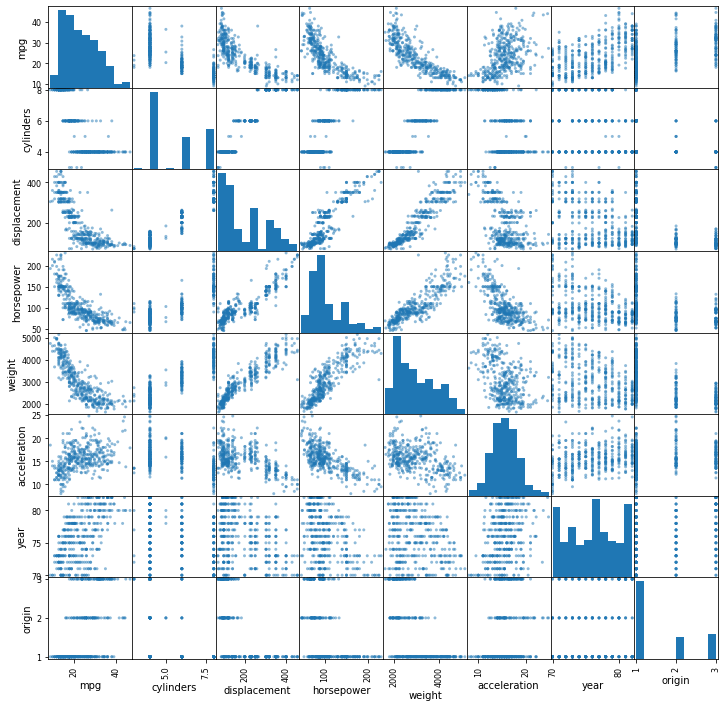

In [9]:
pd.plotting.scatter_matrix(auto_df, figsize=(12,12));

## Problem 9(b)

In [10]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


## Problem 9(c)

In [11]:
import statsmodels.api as sm

X = auto_df.loc[:, auto_df.columns != "mpg"]
y = auto_df["mpg"]

X = sm.add_constant(X)

linear_regression = sm.OLS(y, X)
linear_regression_results = linear_regression.fit()

print(linear_regression_results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.04e-139
Time:                        20:33:59   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

## Problem 9(d)

In [12]:
auto_df.insert(8, "residuals", linear_regression_results.resid)

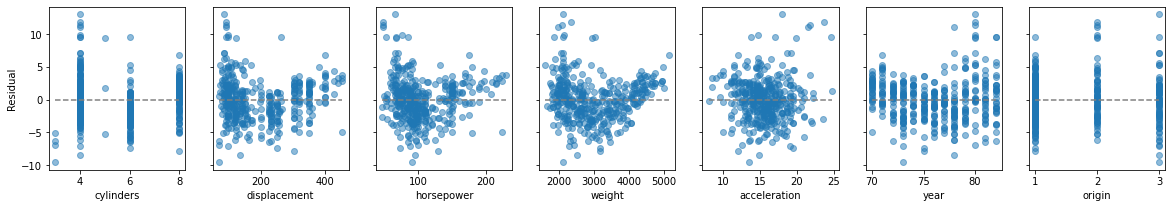

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 7, figsize=(20, 3), sharey=True)
ax[0].set_ylabel("Residual")


for i in np.arange(1,8):
  ax[i-1].plot([auto_df.iloc[:, i].min(), auto_df.iloc[:, i].max()], [0, 0], ls="--", c="gray")
  ax[i-1].scatter(auto_df.iloc[:, i], auto_df["residuals"], alpha=0.5)
  ax[i-1].set_xlabel(auto_df.columns[i])

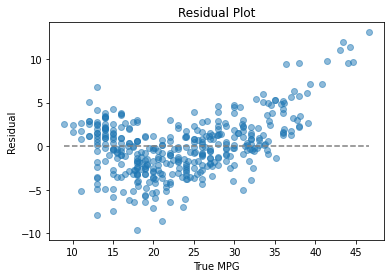

In [14]:
plt.plot(  [auto_df["mpg"].min(), auto_df["mpg"].max()], [0, 0], ls="--", c="gray")
plt.scatter(auto_df["mpg"], auto_df["residuals"], alpha=0.5)
plt.xlabel("True MPG")
plt.ylabel("Residual")
plt.title("Residual Plot");

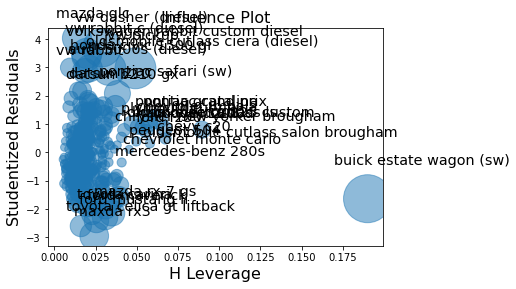

In [15]:
sm.graphics.influence_plot(linear_regression_results, plot_alpha=0.5);

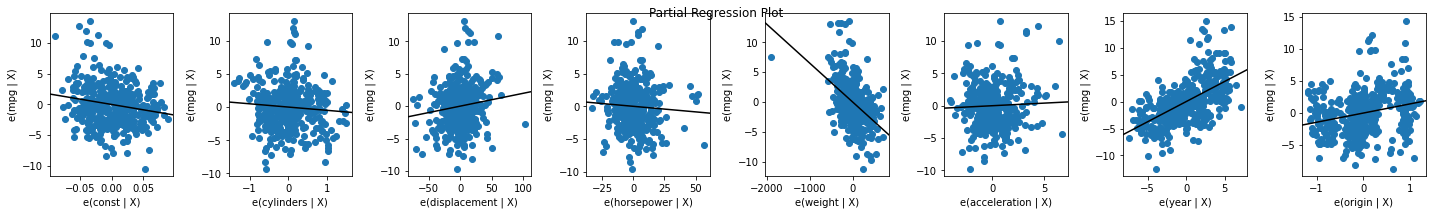

In [16]:
fig = plt.figure(figsize=(20,3))
sm.graphics.plot_partregress_grid(linear_regression_results, grid=(1,8), fig=fig);

## Problem 9(e)

In [17]:
from statsmodels.formula.api import ols

linear_regression_w_interaction = ols(formula='mpg ~ cylinders + displacement + horsepower' + 
                                      ' + weight + acceleration + year + origin + ' + 
                                      'cylinders*displacement + cylinders*horsepower + ' + 
                                      'cylinders*weight + horsepower*displacement', data=auto_df)
linear_regression_w_interaction_results = linear_regression_w_interaction.fit()

print(linear_regression_w_interaction_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     224.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          7.99e-159
Time:                        20:34:03   Log-Likelihood:                -965.98
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     380   BIC:                             2004.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

## Problem 9(f)

In [18]:
linear_regression_w_transformation = ols(formula='mpg ~ cylinders + displacement + horsepower' + 
                                      ' + weight + acceleration + year + origin + ' + 
                                      'np.power(cylinders, 2) + np.power(displacement, 2) + '
                                      'np.power(horsepower, 2) + np.power(weight, 2)', 
                                      data=auto_df)
linear_regression_w_transformation_results = linear_regression_w_transformation.fit()

print(linear_regression_w_transformation_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     222.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          6.80e-158
Time:                        20:34:03   Log-Likelihood:                -968.20
No. Observations:                 392   AIC:                             1960.
Df Residuals:                     380   BIC:                             2008.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# Problem 10 (Chapter 3, Exercise 14)

## Problem 10(a)

In [19]:
data = pd.read_csv("ch3_q14.csv")
data

,x1,x2,y
0,0.265509,0.172565,3.032974
1,0.372124,0.124859,2.763146
2,0.572853,0.320539,2.923800
3,0.908208,0.341168,2.989404
4,0.201682,0.244143,0.989147
...,...,...,...
95,0.797309,0.323573,1.691524
96,0.455274,0.436354,2.496664
97,0.410084,0.206782,2.626532
98,0.810870,0.276805,3.538661


## Problem 10(b)

In [20]:
data.corr()

,x1,x2,y
x1,1.000000,0.835121,0.449845
x2,0.835121,1.000000,0.419917
y,0.449845,0.419917,1.000000


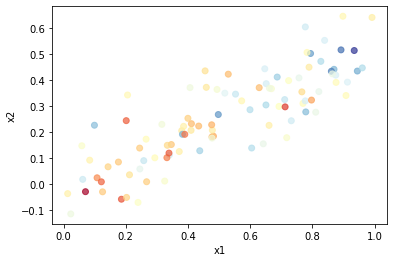

In [21]:
plt.scatter(data["x1"], data["x2"], c=data["y"], cmap="RdYlBu", alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2");

## Problem 10(c)

In [22]:
X = data[["x1","x2"]]
y = data["y"]

X = sm.add_constant(X)

linear_regression_x1_x2 = sm.OLS(y, X)
linear_regression_x1_x2_results = linear_regression_x1_x2.fit()

print(linear_regression_x1_x2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     12.80
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.16e-05
Time:                        20:34:04   Log-Likelihood:                -145.84
No. Observations:                 100   AIC:                             297.7
Df Residuals:                      97   BIC:                             305.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1305      0.232      9.188      0.0

## Problem 10(d)

In [23]:
X = data["x1"]
y = data["y"]

X = sm.add_constant(X)

linear_regression_x1 = sm.OLS(y, X)
linear_regression_x1_results = linear_regression_x1.fit()

print(linear_regression_x1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     24.86
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           2.66e-06
Time:                        20:34:04   Log-Likelihood:                -146.24
No. Observations:                 100   AIC:                             296.5
Df Residuals:                      98   BIC:                             301.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1124      0.231      9.155      0.0

## Problem 10(e)

In [24]:
X = data["x2"]
y = data["y"]

X = sm.add_constant(X)

linear_regression_x2 = sm.OLS(y, X)
linear_regression_x2_results = linear_regression_x2.fit()

print(linear_regression_x2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     20.98
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.37e-05
Time:                        20:34:04   Log-Likelihood:                -147.85
No. Observations:                 100   AIC:                             299.7
Df Residuals:                      98   BIC:                             304.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3899      0.195     12.261      0.0

## Problem 10(g)

In [25]:
data_g = data.append(pd.DataFrame([[0.1, 0.8, 6]], columns=["x1", "x2", "y"]), ignore_index=True)
data_g

,x1,x2,y
0,0.265509,0.172565,3.032974
1,0.372124,0.124859,2.763146
2,0.572853,0.320539,2.923800
3,0.908208,0.341168,2.989404
4,0.201682,0.244143,0.989147
...,...,...,...
96,0.455274,0.436354,2.496664
97,0.410084,0.206782,2.626532
98,0.810870,0.276805,3.538661
99,0.604933,0.138406,4.271852


In [26]:
X = data_g[["x1","x2"]]
y = data_g["y"]

X = sm.add_constant(X)

linear_regression_x1_x2 = sm.OLS(y, X)
linear_regression_x1_x2_results = linear_regression_x1_x2.fit()

print(linear_regression_x1_x2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     13.72
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           5.56e-06
Time:                        20:34:04   Log-Likelihood:                -149.07
No. Observations:                 101   AIC:                             304.1
Df Residuals:                      98   BIC:                             312.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2267      0.231      9.624      0.0

In [27]:
X = data_g["x1"]
y = data_g["y"]

X = sm.add_constant(X)

linear_regression_x1 = sm.OLS(y, X)
linear_regression_x1_results = linear_regression_x1.fit()

print(linear_regression_x1_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     18.33
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           4.29e-05
Time:                        20:34:04   Log-Likelihood:                -152.96
No. Observations:                 101   AIC:                             309.9
Df Residuals:                      99   BIC:                             315.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2569      0.239      9.445      0.0

In [28]:
X = data_g["x2"]
y = data_g["y"]

X = sm.add_constant(X)

linear_regression_x2 = sm.OLS(y, X)
linear_regression_x2_results = linear_regression_x2.fit()

print(linear_regression_x2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     26.66
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           1.25e-06
Time:                        20:34:04   Log-Likelihood:                -149.49
No. Observations:                 101   AIC:                             303.0
Df Residuals:                      99   BIC:                             308.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3451      0.191     12.264      0.0